# Linear Regression Assignment
## Salary Hike
Build a prediction model for Salary_hike

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Exploring Data

In [27]:
data = pd.read_csv('Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


No NA values have found

In [28]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [29]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Adding more columns to check logarithmic and square root relations

In [30]:
data['log_Salary'] = np.log(data['Salary'])
data['sqrt_Salary'] = np.sqrt(data['Salary'])

Checking linearity of data through visual

Text(0.5, 1.0, 'Experience vs square root of salary')

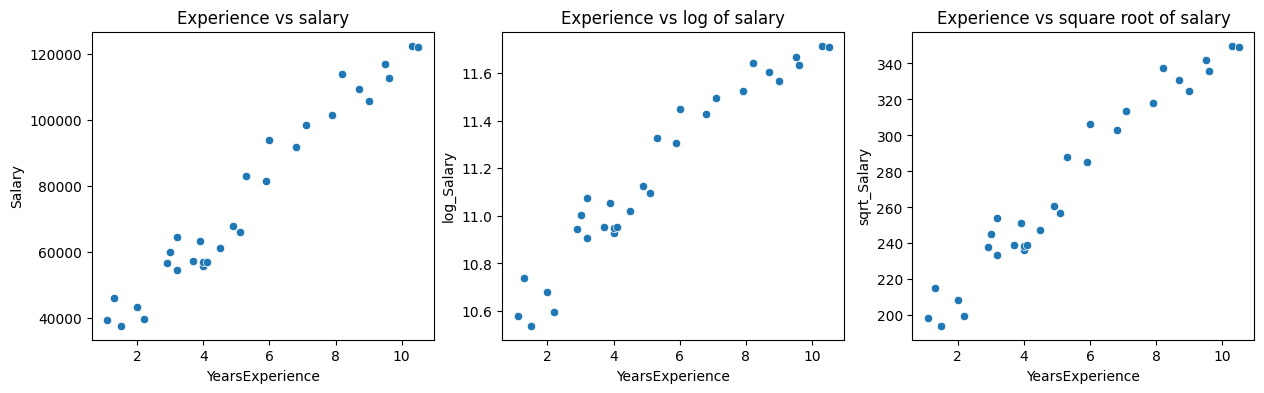

In [31]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])
plt.title('Experience vs salary')
plt.subplot(1,3,2)
sns.scatterplot(x=data['YearsExperience'],y=data['log_Salary'])
plt.title('Experience vs log of salary')
plt.subplot(1,3,3)
sns.scatterplot(x=data['YearsExperience'],y=data['sqrt_Salary'])
plt.title('Experience vs square root of salary')

<Axes: xlabel='Salary', ylabel='Count'>

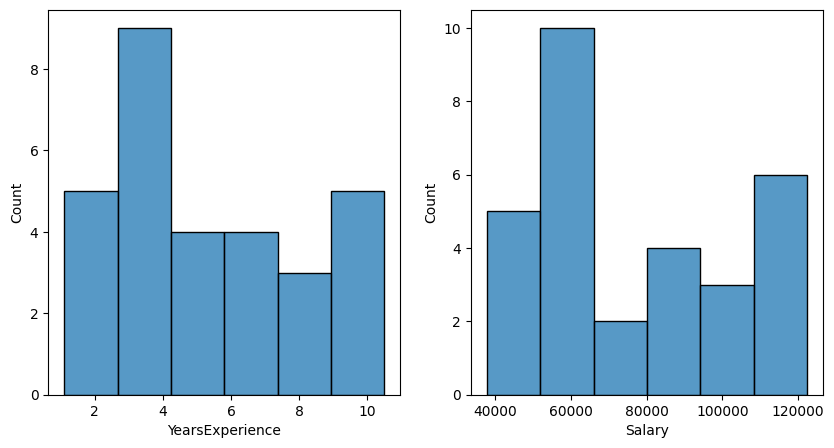

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=data, x='YearsExperience')
plt.subplot(1,2,2)
sns.histplot(data=data, x='Salary')

## Building models
#### Linear target model

In [33]:
import statsmodels.formula.api as smf
linear_model= smf.ols('Salary~YearsExperience',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

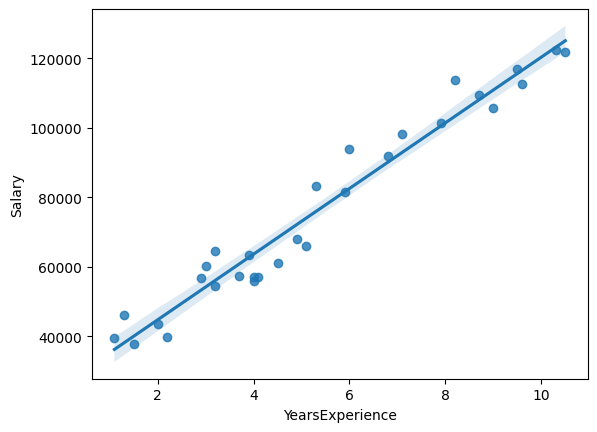

In [34]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

#### Log of target model

<Axes: xlabel='YearsExperience', ylabel='log_Salary'>

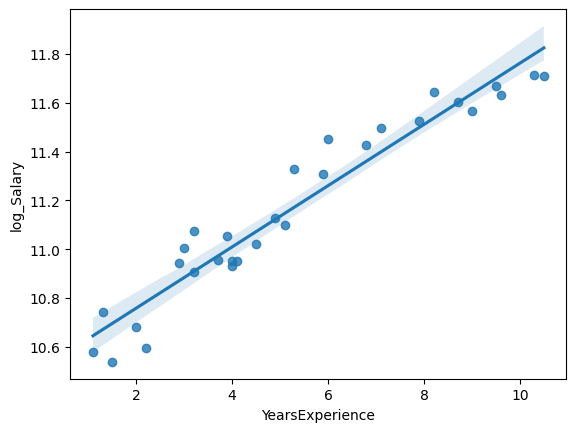

In [35]:
log_model= smf.ols('log_Salary~YearsExperience',data=data).fit()
sns.regplot(x='YearsExperience',y='log_Salary',data=data)

#### Square root of target model

<Axes: xlabel='YearsExperience', ylabel='sqrt_Salary'>

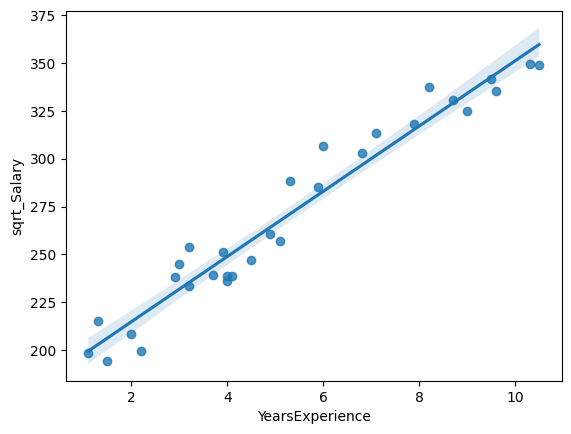

In [36]:
sqrt_model= smf.ols('sqrt_Salary~YearsExperience',data=data).fit()
sns.regplot(x='YearsExperience',y='sqrt_Salary',data=data)

## Metrics
Coparison between all models

In [48]:
models = [linear_model, log_model, sqrt_model]
pd.DataFrame({'Intercept':[model.params[0] for model in models],
              'Slope':[model.params[1] for model in models],
              't-value':[model.tvalues[1] for model in models],
              'p-value':[model.pvalues[1] for model in models],
              'r-square':[model.rsquared for model in models]},
              index=['linear_model','log_model','sqrt_model'])

,Intercept,Slope,t-value,p-value,r-square
linear_model,25792.200199,9449.962321,24.950094,1.143068e-20,0.956957
log_model,10.507402,0.125453,19.584833,7.027439e-18,0.931967
sqrt_model,180.700221,17.056532,23.025247,9.782891e-20,0.949835


#### Prediction
Making a sample point to test our model's prediction

In [12]:
test_data = pd.DataFrame({'YearsExperience':[12,14,20]})

In [50]:
test_data['Salary'] = linear_model.predict(test_data)
test_data['log_Salary'] = np.exp(log_model.predict(test_data))
test_data['sqrt_Salary'] = np.power(sqrt_model.predict(test_data),2)
test_data

,YearsExperience,Salary,log_Salary,sqrt_Salary
0,12,139191.748056,164857.471042,148516.669969
1,14,158091.672699,211873.006080,175973.261291
2,20,214791.446628,449755.635399,272307.448964
